In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [170]:
df = pd.read_csv('https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [171]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [172]:
X = df.drop(columns = ['Outcome']).values
y = df['Outcome'].values

In [173]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [183]:
Y = pd.get_dummies(y).values
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [175]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1557)
print("학습 데이터 개수:", len(X_train))
print("테스트 데이터 개수:", len(X_test))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

학습 데이터 개수: 614
테스트 데이터 개수: 154
(614, 8) (154, 8)
(614, 2) (154, 2)


In [177]:
model = Sequential()

model.add(Dense(10, input_shape = (8, ), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

model.compile(Adam(learning_rate = 0.04), loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                90        
                                                                 
 dense_29 (Dense)            (None, 8)                 88        
                                                                 
 dense_30 (Dense)            (None, 6)                 54        
                                                                 
 dense_31 (Dense)            (None, 2)                 14        
                                                                 
Total params: 246
Trainable params: 246
Non-trainable params: 0
_________________________________________________________________


In [178]:
model_history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.1)

Epoch 1/30
18/18 [==============================] - 1s 14ms/step - loss: 0.6199 - accuracy: 0.6141 - val_loss: 0.5050 - val_accuracy: 0.6935
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.6612 - val_loss: 0.4759 - val_accuracy: 0.6613
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7609 - val_loss: 0.4899 - val_accuracy: 0.7258
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.7627 - val_loss: 0.4319 - val_accuracy: 0.8065
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7717 - val_loss: 0.4445 - val_accuracy: 0.7742
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.7808 - val_loss: 0.4304 - val_accuracy: 0.7903
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.4448 - accuracy: 0.7899 - val_loss: 0.4428 - val_accuracy: 0.7742
Epoch 8/30
18/18 [=

In [179]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis = 1)
y_pred_class = np.argmax(y_pred, axis = 1)

5/5 [==============================] - 0s 2ms/step


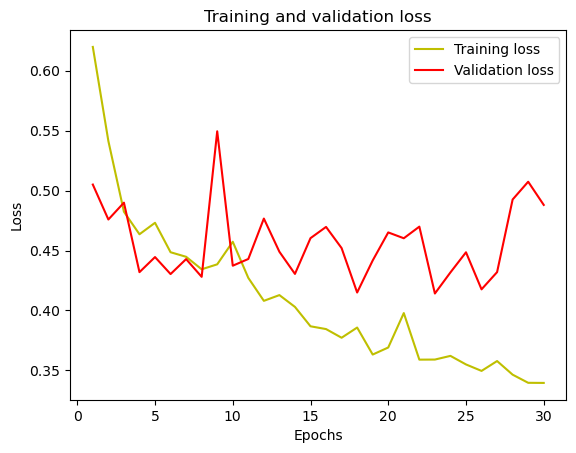

In [180]:
loss = model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

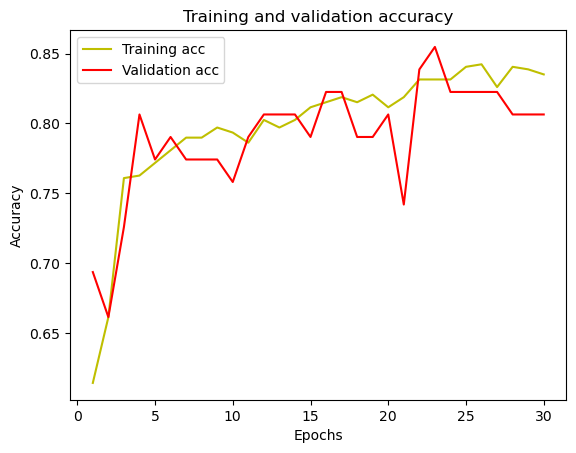

In [181]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [182]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78        97
           1       0.64      0.49      0.55        57

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

[[81 16]
 [29 28]]
